# Linear Support Vector Classifier

Support vector machines are a set of supervised learning algorithms that you can use for classification, regression and outlier detection purposes. SciKit-Learn has many classes for SVM usage, depending on your purpose. The one we'll be focusing on is Support Vector Classifier, SVC.


## An OCR example

In 1982, the first computer-driven, OCR machine got installed by  the United States Postal Service (USPS) in Los Angeles and by the end of 1984, over 250 OCRs machines were installed in 118 major  mail processing centers across the country.
 
Let's see if it's possible to train a support vector classifier in a few seconds using machine learning, and if the classification accuracy is similar or better  than the advertised USPS stats.   
   
We start by reading the dataset, which comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) and is composed by bitmaps of handwritten digits from a preprinted form. 

In [1]:
import pandas as pd

# The Dataset comes from:
# https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits


In [2]:
  # Load up the data.
with open('../Datasets/optdigits.tes', 'r') as f: testing  = pd.read_csv(f)
with open('../Datasets/optdigits.tra', 'r') as f: training = pd.read_csv(f)


In [3]:

  # The number of samples between training and testing can vary
  # But the number of features better remain the same!
n_features = testing.shape[1]

X_test  = testing.iloc[:,:n_features-1]
X_train = training.iloc[:,:n_features-1]
y_test  = testing.iloc[:,n_features-1:].values.ravel()
y_train = training.iloc[:,n_features-1:].values.ravel()

print (n_features)

65


Let's have a look at these bitmaps of handwritten digits 

Peeking the data...


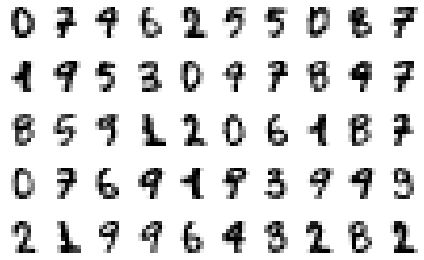

In [4]:
import matplotlib.pyplot as plt

# The 'targets' or labels are stored in y. The 'samples' or data is stored in X
print ("Peeking the data...")
fig = plt.figure()

cnt = 0
for col in range(5):
    for row in range(10):
        plt.subplot(5, 10, cnt + 1)
        plt.imshow(X_train.iloc[cnt,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.axis('off')
        cnt += 1
    fig.set_tight_layout(True)
plt.show()


### Train the SVM Classifier

Now we are ready to train the Support Vector Classifier, using the SciKitLearn library.  
We leave all parameters at their defaults, setting only the kernel to be Linear.  
More on the kernels later in this notebook.

In [5]:
from sklearn import svm # Library for Support Vector Machines


In [6]:
#
# Create and train an SVM classifier. 

print ("Training SV Classifier...")
svc = svm.SVC(kernel='linear')

svc.fit(X_train, y_train) 


Training SV Classifier...


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Checkpoint
Print the predicted digit and the actual label for a random example.   
We take the thousandth digit.

In [7]:
#
# Print out the TRUE value of the 1000th digit in the test set
# By TRUE value, we mean, the actual provided label for that sample
#
true_1000th_test_value = y_test[999]
print ("1000th test label is: ", true_1000th_test_value)

1000th test label is:  1


In [8]:
#
# Predict the value of the 1000th digit in the test set.
# Was the model's prediction correct?
#
guess_1000th_test_value = svc.predict(X_test[999:1000])

print ("1000th test prediction is: ", guess_1000th_test_value)


1000th test prediction is:  [1]


The model's prediction was **correct**.  
We can display that image, so we can visually check if it was a hard image or an easy image:

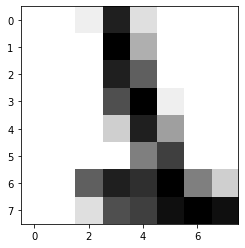

In [9]:
#
# Use IMSHOW to display the 1000th test image
# 
#
plt.imshow(X_test.iloc[999,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest');

### visual confirmation of accuracy
Here we can print more digits with indication of what was the predicted label (in red if it was wrong):

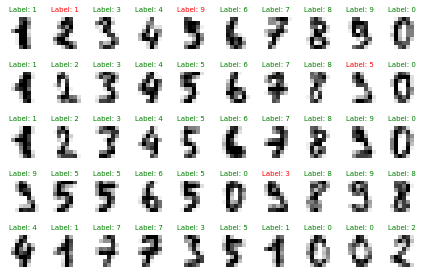

In [10]:
# Visual Confirmation of accuracy

fig = plt.figure()

  # Make some guesses
y_guess = svc.predict(X_test)


num_rows = 10
num_cols = 5

index = 0
for col in range(num_cols):
    for row in range(num_rows):
        plt.subplot(num_cols, num_rows, index + 1)

      # 8x8 is the size of the image, 64 pixels
        plt.imshow(X_test.iloc[index,:].values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

      # Green = Guessed right
      # Red = Fail!
        fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
        plt.title('Label: %i' % y_guess[index], fontsize=7, color=fontcolor)
        plt.axis('off')
        index += 1
fig.set_tight_layout(True)
plt.show()

### Score
We can see that - on this sample of 50 handwritten digits - 4 of them are wrong, that's 8%.  
And here we calculate the score on the entire testing dataset:

In [11]:
# Calculate the score of the SVC against the testing data
print ("Scoring SVM Classifier...")
#
score = svc.score(X_test, y_test)
print ("Score: ", score)

Scoring SVM Classifier...
Score:  0.9610244988864143


Not bad, the model was correct more than 96% of the times!

## Non-linear Kernels for the SVC

We experiment now with different kernels, starting with the polynomial kernel. 
  
When training an SVM with a kernel, two additional parameters must be considered: *C* and *gamma*.  
The parameter *C*, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface.  
A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.  
We keep C at the default value = 1.  
  
*Gamma* defines how much influence a single training example has.  
The larger gamma is, the closer other examples must be to be affected.
  
USPS has an advertised accuracy score of 98% which is higher than our SVC with a linear Kernel.  
We can beat it with a non-linear kernel!  


In [12]:
#
# We start with the POLY kernel

svc = svm.SVC(kernel='poly', C=1.0, gamma=0.001)
svc.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# Calculate the score of the SVC against the testing data
print ("Scoring SV poly Classifier...")
score = svc.score(X_test, y_test)
print ("Score: ", score)

Scoring SV poly Classifier...
Score:  0.9749443207126949


Which is sightly better, but we can try a different kernel, more performant: the Radial Basis Function (RBF) kernel.  


In [14]:
#
# change  SVC's kernel to 'rbf' 

svc = svm.SVC(kernel='rbf', C=1.0, gamma=0.001)
svc.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# Calculate the score of SVC against the testing data
print ("Scoring SVM rbf Classifier...")
score = svc.score(X_test, y_test)
print ("Score: ", score)



Scoring SVM rbf Classifier...
Score:  0.982739420935412


Now it's better than the UPS' score!

# Hyper-parameters tuning for SVC Kernels

Proper choice of *C* and *gamma* is critical to the SVM’s performance.  
One is advised to use *sklearn.model_selection.GridSearchCV* with C and gamma spaced exponentially far apart to choose good values.

We will tune them - and the pre-processor - using a different example.

## A Parkinson's classifier

Apply SVC to the Parkinson's Data Set, provided courtesy of UCI's Machine Learning Repository. [The dataset](https://archive.ics.uci.edu/ml/datasets/Parkinsons) was created at the University of Oxford, in collaboration with 10 medical centers around the US, along with Intel who developed the device used to record the primary features of the dataset: speech signals. 
  

Goals: first to see if it's possible to differentiate between people who have Parkinson's and who don't using SciKit-Learn's support vector classifier and then to take a first-stab at a naive way of fine-tuning our parameters in an attempt to maximize the accuracy of the testing set.  
  
### Read and pre-process the data

In [16]:
X = pd.read_csv("../Datasets/parkinsons.data")


In [17]:
X.drop(['name'], axis=1, inplace=True) # drop name column

y = X.status.copy() # copy “y” values out from status

X.drop(['status'], axis=1, inplace=True) # drop status column


In [18]:
# Perform a train/test split. 30% test group size, with a random_state equal to 7.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=7)


We can apply different scaler for the pre-processing.  
The standard scaler seems the best, feel free to experiment with others, uncommenting one below:

In [19]:
from sklearn import preprocessing


  # tried with different scaler, standard is the best
    
scaler = preprocessing.StandardScaler() # best score was 0.932203389831
#scaler = preprocessing.MinMaxScaler()  # best score was 0.881355932203 
#scaler = preprocessing.MaxAbsScaler()  # best score was 0.881355932203 
#scaler = preprocessing.Normalizer()    # best score was 0.796610169492 
#scaler = preprocessing.KernelCenterer() # best score was 0.915254237288 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Same for the dimensionality reduction: feel free to experiment with PCA or Isomap

In [20]:
from sklearn.decomposition import PCA
from sklearn import manifold

usePCA = False # change this to use PCA as dimensionality reducer

if usePCA:
    reducer = PCA(n_components=7).fit(X_train)
else:
    reducer = manifold.Isomap(n_neighbors=3, n_components=6).fit(X_train)

X_train = reducer.transform(X_train)
X_test  = reducer.transform(X_test)


### Train the SVM classifier. 

Create and fit an SVC based on the RBF kernel against the training data and then finally score the testing data.  

To search the best hyper-parameters we just use simple nested loops.  
Looping *C* from 0.05 to 2 and looping *gamma* from 0.001 to 0.1

In [21]:
import numpy as np

  # a naive, best-parameter search using nested for-loops.
best_score = 0
for c in np.arange(0.05,2,0.05):
    for gamma in np.arange(0.001, 0.1, 0.001):
        svc = svm.SVC(kernel='rbf', C=c, gamma=gamma)

        svc.fit(X_train, y_train) 

        score = svc.score(X_test, y_test)
        if score > best_score:
            best_score = score
            #print ("New best score:", score, "using C= ", c, "and gamma = ", gamma)
            print(f"New best score: {score:.3f} using C=  {c:.2f} and gamma = {gamma:.3f}")




New best score: 0.797 using C=  0.05 and gamma = 0.001
New best score: 0.814 using C=  0.10 and gamma = 0.010
New best score: 0.831 using C=  0.10 and gamma = 0.012
New best score: 0.847 using C=  0.15 and gamma = 0.013
New best score: 0.864 using C=  0.20 and gamma = 0.013
New best score: 0.881 using C=  0.35 and gamma = 0.020
New best score: 0.898 using C=  0.45 and gamma = 0.046
New best score: 0.915 using C=  0.50 and gamma = 0.087
New best score: 0.932 using C=  0.55 and gamma = 0.096
New best score: 0.949 using C=  0.85 and gamma = 0.088


Best score was with C=0.85 and gamma=0.088

# Comparing KNN vs. SVC

How does SVC compare with other classifiers, such as the KNN?  
We classify the UCI's wheat-seeds dataset - that we used previously with the KNN algorithm - by using the SVC and compare the results.  
First, benchmark how long it takes to train and predict with SVC relative to how long K-Neighbors took to train and test and then compare the decision boundary plot produced by the two.

## Defining some parameters

In [22]:
# 
# INFO:  Parameters can be adjusted here
C = 1
kernel = 'linear'
iterations = 100   

#
# INFO: You can set this to false if you want to
# draw the full square matrix
FAST_DRAW = True

## Read the data

In [24]:
# 
# Load up the wheat dataset into dataframe 'X'
#
df = pd.read_csv("../Datasets/wheat.data", index_col='id')


## Data pre-processing
This is all standard.  You can refer to the previous examples for more details, especially the KNN example.

In [25]:
# INFO: An easy way to show which rows have nans in them
print (df[pd.isnull(df).any(axis=1)])


      area  perimeter  compactness  length  width  asymmetry  groove  \
id                                                                     
7    14.11      14.10       0.8911  5.4200  3.302      2.700     NaN   
35   16.12      15.00          NaN  0.9000    NaN      5.709   3.485   
60   11.42      12.86       0.8683  5.0080  2.850      2.700     NaN   
135  15.38      14.66       0.8990  5.4770  3.465      3.600     NaN   
169  11.24      13.00          NaN  0.8359  5.090      2.715   3.521   
170  11.02      13.00          NaN  0.8189  5.325      2.701   6.735   
201  12.67      13.32       0.8977  4.9840  3.135      2.300     NaN   

    wheat_type  
id              
7     canadian  
35    canadian  
60    canadian  
135   canadian  
169   canadian  
170   canadian  
201   canadian  


In [26]:
# 
# Go ahead and drop any row with a nan
#
df.dropna(axis=0, inplace=True)


# 
# INFO: you might try setting the nan values to the
# mean value of that column, the mean should only be calculated for
# the specific class rather than across all classes, now that you
# have the labels

In [27]:
#
# Copy the labels out of the dset into variable 'y' then Remove
# them from X. Encode the labels -- canadian:0, kama:1, and rosa:2
#
labels = df.wheat_type.copy() # copy “y” values out
df.drop(['wheat_type'], axis=1, inplace=True) # drop output column 

labels = labels.map({'canadian':0, 'kama':1, 'rosa':2})


## Split into training and testing data sets

In [29]:
# 
# Split data into test / train sets
#

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, 
                                                    random_state=7)


## Utility function: draw the plots
This is a convenience function to break any higher-dimensional space down and view cross sections of it.

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):


  # If this line throws an error, use plt.style.use('ggplot') instead
  mpl.style.use('ggplot') # Look Pretty

  padding = 3
  resolution = 0.5
  max_2d_score = 0
  score = 0


  y_colors = ['#ff0000', '#00ff00', '#0000ff']
  my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
  colors = [y_colors[i] for i in y_train]
  num_columns = len(X_train.columns)

  fig = plt.figure()
  fig.canvas.set_window_title(wintitle)
  
  cnt = 0
  for col in range(num_columns):
    for row in range(num_columns):
      # Easy out
      if FAST_DRAW and col > row:
        cnt += 1
        continue

      ax = plt.subplot(num_columns, num_columns, cnt + 1)
      plt.xticks(())
      plt.yticks(())

      # Intersection:
      if col == row:
        plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
        cnt += 1
        continue


      # Only select two features to display, then train the model
      X_train_bag = X_train.iloc[:, [row,col]]
      X_test_bag = X_test.iloc[:, [row,col]]
      model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
      x_min, x_max = X_train_bag.iloc[:, 0].min() - padding, X_train_bag.iloc[:, 0].max() + padding
      y_min, y_max = X_train_bag.iloc[:, 1].min() - padding, X_train_bag.iloc[:, 1].max() + padding
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())

      # Prepare the contour
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
      plt.scatter(X_train_bag.iloc[:, 0], X_train_bag.iloc[:, 1], c=colors, alpha=0.5)


      score = round(model.score(X_test_bag, y_test) * 100, 3)
      #plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
      plt.text(0.5, 0, f"Score: {score}", transform = ax.transAxes, horizontalalignment='center', fontsize=8)
      max_2d_score = score if score > max_2d_score else max_2d_score

      cnt += 1

  print ("Max 2D Score: ", max_2d_score)
  fig.set_tight_layout(True)

## Utility function: benchmark times

In [31]:
import time

def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
  print ('\n\n' + wintitle + ' Results')
  
  # the only purpose of doing many iterations was to get a more accurate 
  # count of the time it took for each classifier
  s = time.time()
  for i in range(iterations):
    #
    # train the classifier on the training data / labels:
    #
    model.fit(X_train, y_train) 

    
  #print ("{0} Iterations Training Time: ".format(iterations), time.time() - s)
  print(f"{iterations} Iterations Training Time: {time.time() - s:.3f}")

  scoreBch = 0

  s = time.time()
  for i in range(iterations):
    #
    # score the classifier on the testing data / labels:
    #
    scoreBch = model.score(X_test, y_test)

    
  #print ("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
  print(f"{iterations} Iterations Scoring Time: {time.time() - s:.3f}")

  print ("High-Dimensionality Score: ", round((scoreBch*100), 3))



## Train the Knn classifier

In [32]:
#
# Create an KNeighbors classifier 
#
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)


And get its benchmark:

In [33]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')




KNeighbors Results
100 Iterations Training Time: 0.582
100 Iterations Scoring Time: 2.509
High-Dimensionality Score:  83.607


Max 2D Score:  90.164


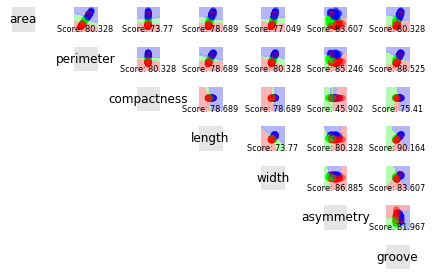

In [34]:
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')


## Train the SVM Classifier

In [35]:
#
# Create an SVM classifier
# Use a linear kernel, and set the C value to C (see initial parameters)
#
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=C)

In [36]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')




SVC Results
100 Iterations Training Time: 0.677
100 Iterations Scoring Time: 0.466
High-Dimensionality Score:  86.885


Max 2D Score:  93.443


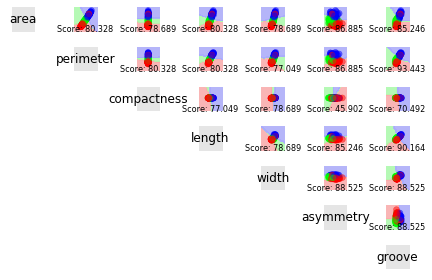

In [37]:
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')


SVC in high dimensions, even with a provided kernel, still attempts to find the best linearly separable plane to split your classes.  
If you have 'dirty' features thrown into the mix, it's entirely possible they  will end up hurting your overall SVC performance, as opposed to just having a few really good features.  

Benchmarks with 5000 iterations:  
===========================
KNeighbors Results  
5000 Iterations Training Time: 1.88873505592  
5000 Iterations Scoring Time: 3.78048992157  
High-Dimensionality Score: 83.607  
Max 2D Score: 90.164  
SVC Results  
5000 Iterations Training Time: 3.79915714264  
5000 Iterations Scoring Time: 1.65462088585  
High-Dimensionality Score: 86.885  
Max 2D Score: 93.443  


KNN trained faster but predicted slower than SVC.  
SVC had the best score.